In [ ]:
import mysql.connector as sql
import pandas as pd
from configparser import ConfigParser
from pandas import HDFStore,DataFrame


In [ ]:
parser = ConfigParser()
parser.read('gcloud.conf')

host  =  parser.get('db', 'host')
db    =  parser.get('db', 'db')
user  =  parser.get('db', 'user')
passw =  parser.get('db', 'user')


db_connection = sql.connect(host=host, database=db, user=user, password=passw)
db_cursor = db_connection.cursor()
query = "SELECT * FROM all_physical"


In [ ]:
pdata = pd.read_sql(query, db_connection)

In [ ]:
db_connection.close()
pdata[NumFeatures] = pdata[NumFeatures].apply(pd.to_numeric)
pdata['Timestamp'] = pdata['Timestamp'].apply(pd.to_datetime)
pdata['EVENT'] = pdata['EVENT'].astype('category')


In [ ]:
pdata['EVENT'] = pdata['EVENT'].str.replace('A ttack', 'Attack')

In [ ]:
store['pdata'] = pdata  # save it
store.close()

# Start Here

In [1]:
from pandas import HDFStore,DataFrame
import pandas as pd
store = HDFStore('store.h5')


In [2]:
pdata = pd.read_hdf(store)
pdata = pdata.sort_values('Timestamp')

In [3]:
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
print(len(NumFeatures), "Continuous Features \n", NumFeatures)
print("\n \n")
print(len(catFeatures), "Categorical features \n\n\n", catFeatures)


NumFeatures.remove("Timestamp")
print("\n \n")

print(len(NumFeatures), "Upadated List of Continuous Features \n", NumFeatures)
print("\n \n")

52 Continuous Features 
 ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

 

1 Categorical features 


 ['EVENT']

 

51 Upadated List of Continuous Features 
 ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT5

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  

#### Is the distribution even? Lets explore time in depth.

### Visualize target variable, with barplots

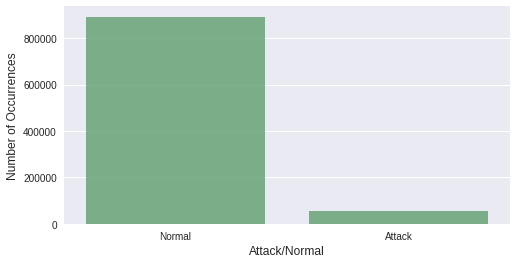

In [5]:
attacks = pdata['EVENT'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(attacks.index, attacks.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Attack/Normal', fontsize=12)
plt.show()

## Distribution By Days

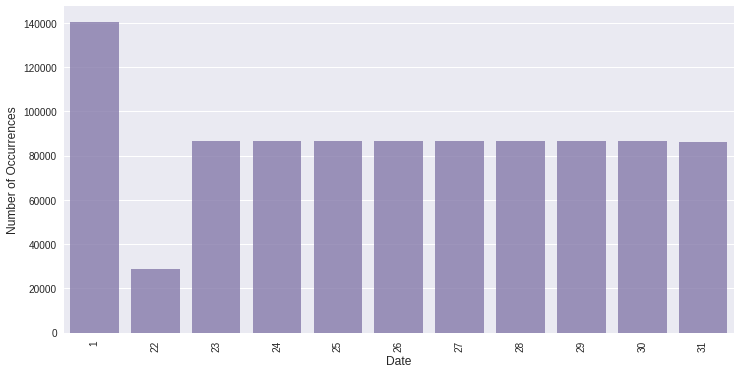

In [6]:
hours = pdata['Timestamp'].dt.day
cnt_srs = hours.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

#### First day was the least active while the last day was most active.

## Distribution By Hour

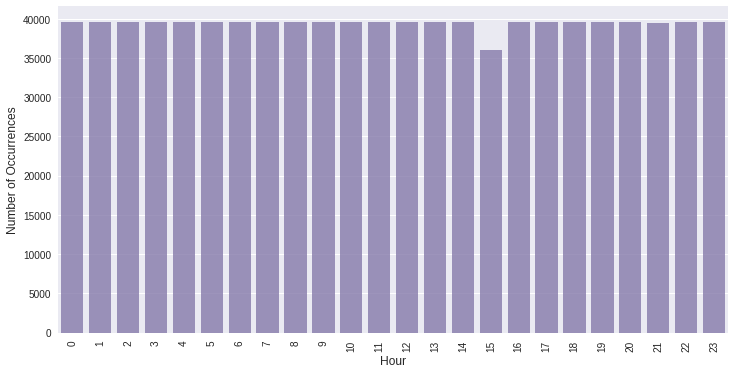

In [7]:
hours = pdata['Timestamp'].dt.hour

cnt_srs = hours.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

#### There is a significant drop at 3pm.

In [8]:
bool_cols = [col for col in pdata 
             if pdata[[col]].dropna().isin([0, 1]).all().values]

In [10]:
pdata[bool_cols].describe()

,P202,P401,P404,P502,P601,P603
count,946719.0,946719.0,946719.0,946719.0,946719.0,946719.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


#### Strange. All of these columns have same value for throughout the dataset. We can certainly drop these columns from our dataset.

In [11]:
pdata.drop(bool_cols, axis = 1, inplace = True)

In [12]:
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)

In [14]:
for col in pdata:
    if(pdata[[col]].dropna().isin([1, 2]).all().values):
        catFeatures.append(col)
        pdata[col].astype('category')

In [16]:
NumFeatures = [x for x in NumFeatures if x not in catFeatures ]

In [17]:
len(NumFeatures) + len(catFeatures) + len(bool_cols)

53

# Statistics for the data
### Mean, Median snd Std. dev. etc.

In [18]:
pdata[NumFeatures].describe()

,FIT101,LIT101,MV101,AIT201,AIT202,AIT203,FIT201,MV201,DPIT301,FIT301,...,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601
count,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,...,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000
mean,1.782889,596.041402,1.693162,238.341348,8.454710,334.957608,1.768831,1.719197,16.212524,1.775459,...,265.880281,13.427842,1.658442,1.233526,0.707877,0.295526,242.015200,1.102465,182.878164,0.015417
std,1.164297,125.001581,0.470804,36.220978,0.124405,40.096568,1.097019,0.457877,7.254261,0.867696,...,5.977529,8.725355,0.326799,0.243721,0.140179,0.059783,45.864317,0.335920,35.416443,0.153964
min,0.000000,120.623700,0.000000,168.033800,6.000000,285.337100,0.000000,0.000000,0.000000,0.000000,...,244.873100,7.344271,0.000000,0.000000,0.000000,0.000000,8.891951,0.000000,3.108177,0.000000
25%,0.000000,508.990500,1.000000,198.218400,8.363433,318.559400,0.000000,1.000000,19.505090,2.196714,...,261.567500,11.650860,1.713535,1.264634,0.732324,0.306569,248.702300,0.961138,187.355800,0.000000
50%,2.484707,527.400100,2.000000,258.619600,8.411177,329.248900,2.444879,2.000000,19.854020,2.208372,...,266.662400,12.458340,1.723661,1.281798,0.734885,0.306889,250.640900,1.089290,189.166200,0.000064
75%,2.585594,702.899100,2.000000,265.540900,8.553127,333.529900,2.452696,2.000000,20.042900,2.214649,...,269.898700,14.573190,1.731735,1.293967,0.739366,0.308426,253.268400,1.265498,192.210300,0.000128
max,2.760145,1000.000000,2.000000,272.526300,8.988273,567.469900,2.826899,2.000000,45.000000,2.376197,...,297.263500,442.463500,1.757754,1.361983,0.763691,0.317010,264.643700,3.668343,200.637600,1.802710


In [19]:
pdata[catFeatures].describe()

,EVENT,P101,P102,P201,P203,P204,P205,P206,P301,P302,P402,P403,UV401,P501,P602
count,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719,946719
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Normal,2,1,1,2,1,2,1,1,2,2,1,2,2,1
freq,892819,682947,943594,892248,680851,946663,638635,946664,944748,755273,911495,946659,910166,910025,938693


## Now that we have variables in order, lets find out what categorical variables are only significant during attacks?

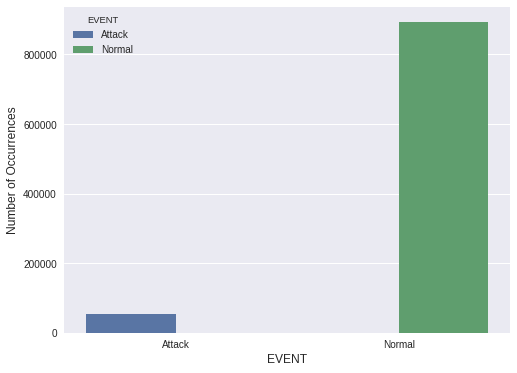

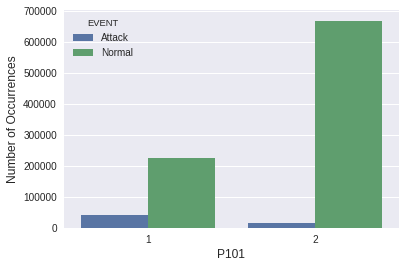

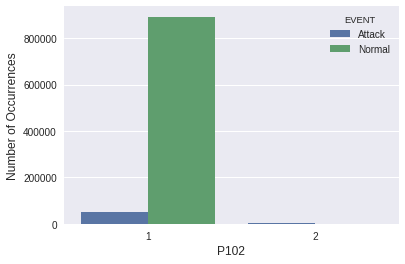

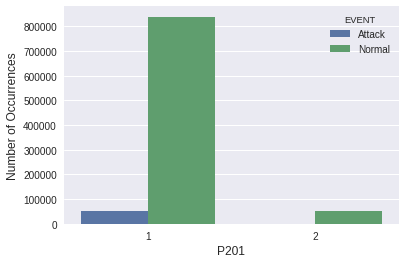

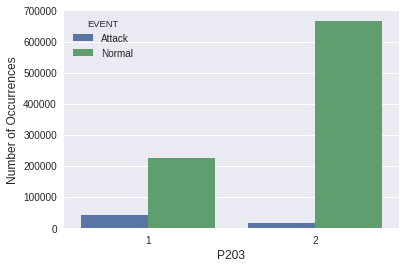

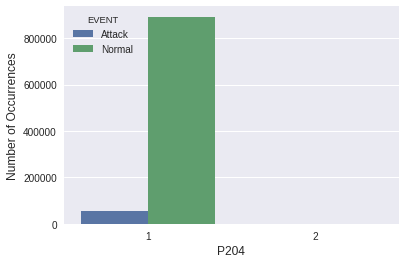

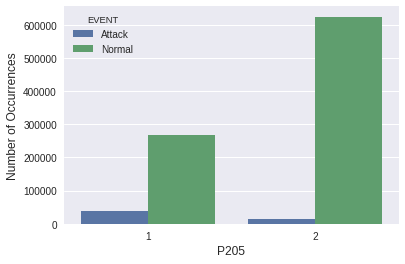

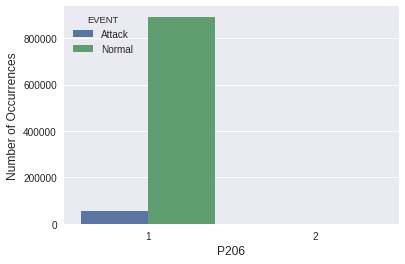

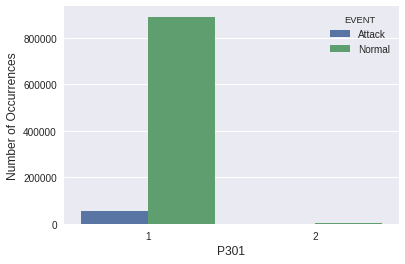

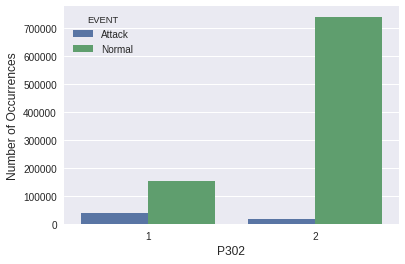

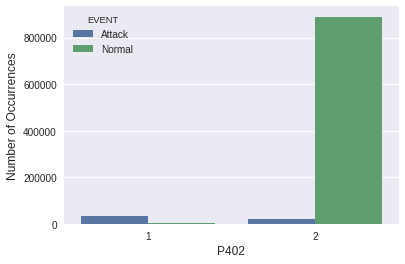

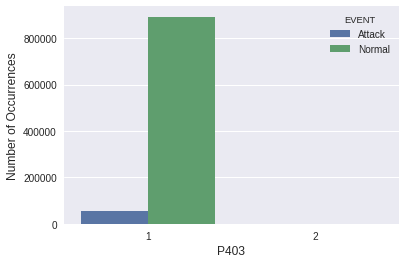

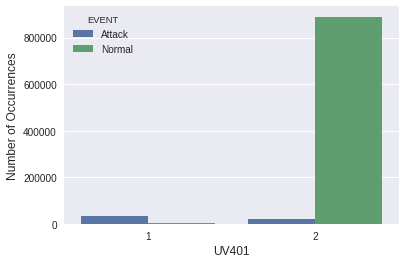

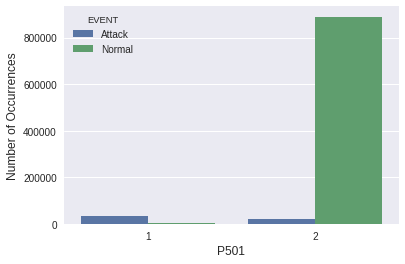

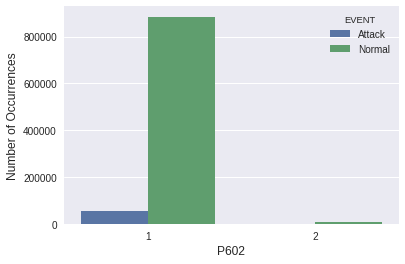

In [25]:
plt.figure(figsize=(8,6))
for i in catFeatures:
    sns.countplot(x=i, hue='EVENT', data=pdata)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(i, fontsize=12)
    plt.show()



#### Notice P402, UV401, P501? one of their values is directly related to the attacks.

In [50]:
plt.figure(figsize=(12,6))
for i in NumFeatures[1:]:
    sns.violinplot(x=i, y='EVENT', data=pdata, ax = ax, split =True)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(i, fontsize=12)
    plt.show()

NameError: name 'ax' is not defined

#### A general observation here, during attacks the distributions look rather squeezed. Attacks focus on a specific value range.

# Features with Correlation Higher Than .95!!

In [39]:
len(NumFeatures[1:])

31

In [41]:
data_cor = pdata[NumFeatures[1:]].corr()
# Set the threshold and add to pairs to list
t = 0.95
cor_list = []

#Find Pairs and update cor_list
for i in range(0,31):
    for j in range(i+1,31):
        if (data_cor.iloc[i,j] >= t and data_cor.iloc[i,j] < 1) or (data_cor.iloc[i,j] < 0 and data_cor.iloc[i,j] <= -t):
            cor_list.append([data_cor.iloc[i,j],i,j])

#Sort by corr coef
sorted_list = sorted(cor_list,key=lambda x: -abs(x[0]))

for v,i,j in sorted_list:
    print ("%s and %s = %.5f" % (NumFeatures[1:][i],NumFeatures[1:][j],v))



PIT501 and PIT503 = 0.99969
FIT503 and PIT501 = 0.99829
FIT501 and FIT502 = 0.99763
FIT503 and PIT503 = 0.99681
FIT501 and FIT503 = 0.99587
FIT501 and PIT501 = 0.99495
FIT503 and FIT504 = 0.99398
FIT501 and PIT503 = 0.99328
FIT502 and FIT503 = 0.99171
FIT401 and FIT503 = 0.99037
FIT502 and PIT501 = 0.99025
FIT401 and FIT501 = 0.98997
FIT401 and FIT502 = 0.98851
FIT502 and PIT503 = 0.98820
FIT504 and PIT501 = 0.98694
FIT401 and PIT501 = 0.98641
FIT401 and FIT504 = 0.98615
FIT501 and FIT504 = 0.98399
FIT401 and PIT503 = 0.98378
FIT504 and PIT503 = 0.98372
FIT502 and FIT504 = 0.97985
FIT201 and MV201 = 0.97444
FIT101 and MV101 = 0.96915
DPIT301 and FIT301 = 0.95311


### We can observe a very large number of features have strong correlation between them, these relationships need to be explored further. This could mean that we could use much smaller representation of the dataset.


In [42]:
hi_corr_features = []
for v,i,j in sorted_list:
    hi_corr_features.append(i)
    hi_corr_features.append(j)
    
hi_corr_features = list(set(hi_corr_features))

# Histograms for features with highest correlations 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc426cfd30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdc426a9160>]], dtype=object)

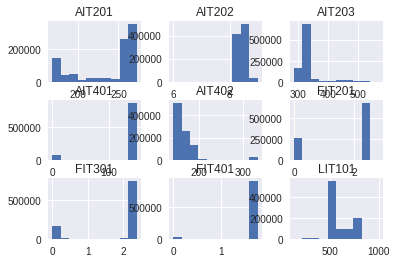

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
pdata.iloc[:,hi_corr_features].hist()

In [45]:
#While finding corr we only used the NumFeat
hi_corr_features = map(lambda x:x+1, hi_corr_features)

### Let's normalize the data so we can see what is happening here.

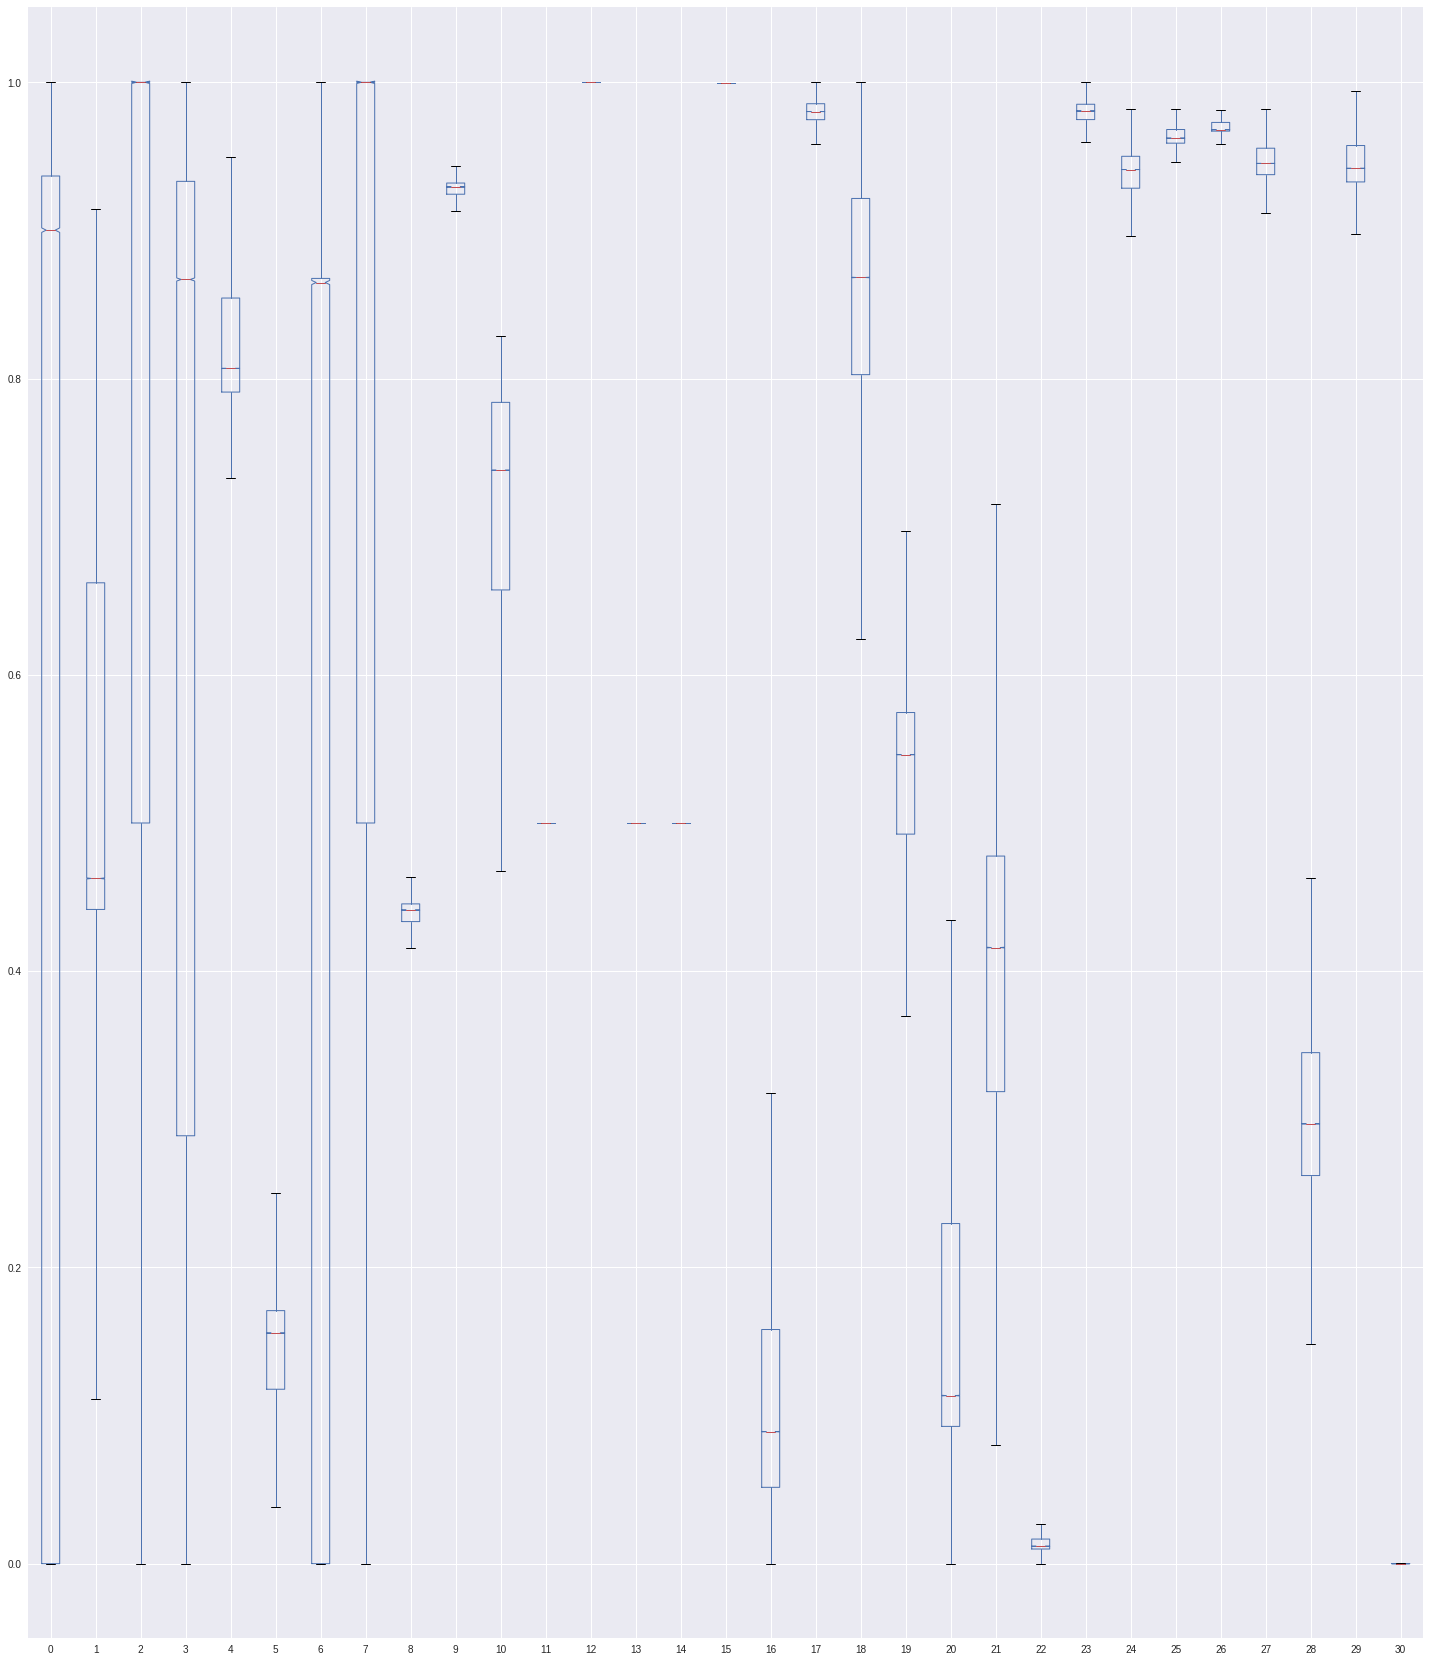

In [47]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(pdata[NumFeatures[1:]])
df_normalized = pd.DataFrame(np_scaled)
fig = plt.subplots(figsize=(25,  30))
df_normalized.boxplot(widths = 0.4, notch=True)

In [83]:
X_cat = pd.get_dummies(pdata , columns=catFeatures[1:])


In [75]:
dummies = ['P101_1', 'P101_2','P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1',
'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1',
'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2']

In [90]:
y = pdata['EVENT'] == 'Attack'

In [138]:
from sklearn.model_selection import train_test_split
X = X_cat[NumFeatures[1:] + dummies]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [139]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

from sklearn.model_selection import learning_curve
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

In [140]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [141]:
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1], 'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb, parameters, X_train, y_train, scoring)

In [142]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)

0.998453608247
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)


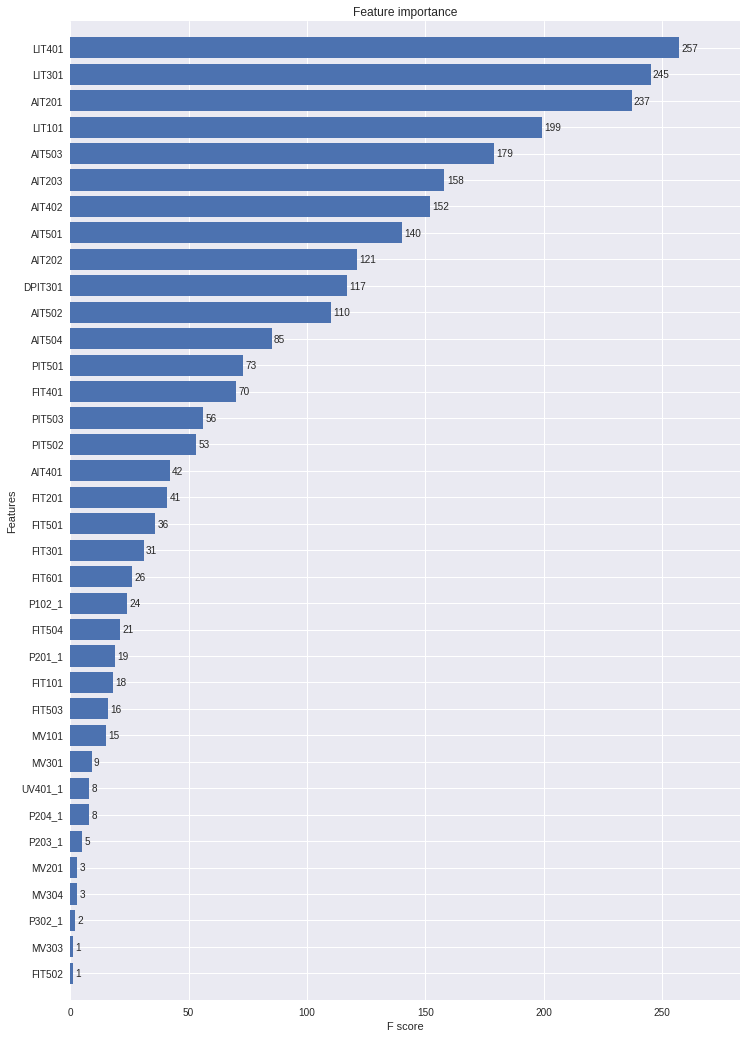

In [146]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(clf_xgb1, height=0.8, ax=ax)
plt.show()